# 과제 1.1
주사위 두 개를 굴려서 나온 눈의 수를 사용해서 두 자리 숫자를 크게 만드는 사람이 이기는 게임이다. 주사위를 처음 굴려서 나온 눈의 수를 10의 자리와 1의 자리 중 어느 곳에 사용할 지 먼저 결정해야 한다. 그런 다음 두 번째로 주사위를 굴려서 나온 눈의 수는 자동으로 남은 자리의 숫자로 사용된다.

In [ ]:
two_dice <-read.csv("two_dice.csv")

In [ ]:
head(two_dice)

,dice1,dice2
,<int>,<int>
1,1,4
2,1,2
3,5,3
4,6,2
5,3,3
6,1,5


# **최선의 전략짜기**


1.   첫 번째 주사위 눈이 4 이상일때 십의 자리에 배치하기
2.   첫 번째 주사위 눈이 5 이상일때 십의 자리에 배치하기
3.   첫 번째 주사위 눈이 6 이상일때 십의 자리에 배치하기



첫 번째 주사위 눈이 4 이상일때 십의 자리 배치하기

In [ ]:
result_1 <- ifelse(two_dice$dice1 >= 4,
                 two_dice$dice1 * 10 + two_dice$dice2,
                 two_dice$dice1 + two_dice$dice2 * 10)

In [ ]:
sum(result_1)

[1] 45241257

첫 번째 주사위 눈이 5이상일때 십의 자리 배치하기

In [ ]:
result_2 <- ifelse(two_dice$dice1 >= 5,
                 two_dice$dice1 * 10 + two_dice$dice2,
                 two_dice$dice1 + two_dice$dice2 * 10)

In [ ]:
sum(result_2)

[1] 44482521

첫 번째 주사위 눈이 6이상일때 십의 자리 배치하기


In [ ]:
result_3 <- ifelse(two_dice$dice1 >= 6,
                 two_dice$dice1 * 10 + two_dice$dice2,
                 two_dice$dice1 + two_dice$dice2 * 10)

In [ ]:
sum(result_3)

[1] 42228705

첫 번째 주사위 눈이 4 이상일 때 십의 자리에 배치하는 것이 총합이 가장 높으므로 최선의 전략이다.

In [ ]:
mean(result_1)

[1] 45.24126

최선의 전략일 때 확률분포 그래프

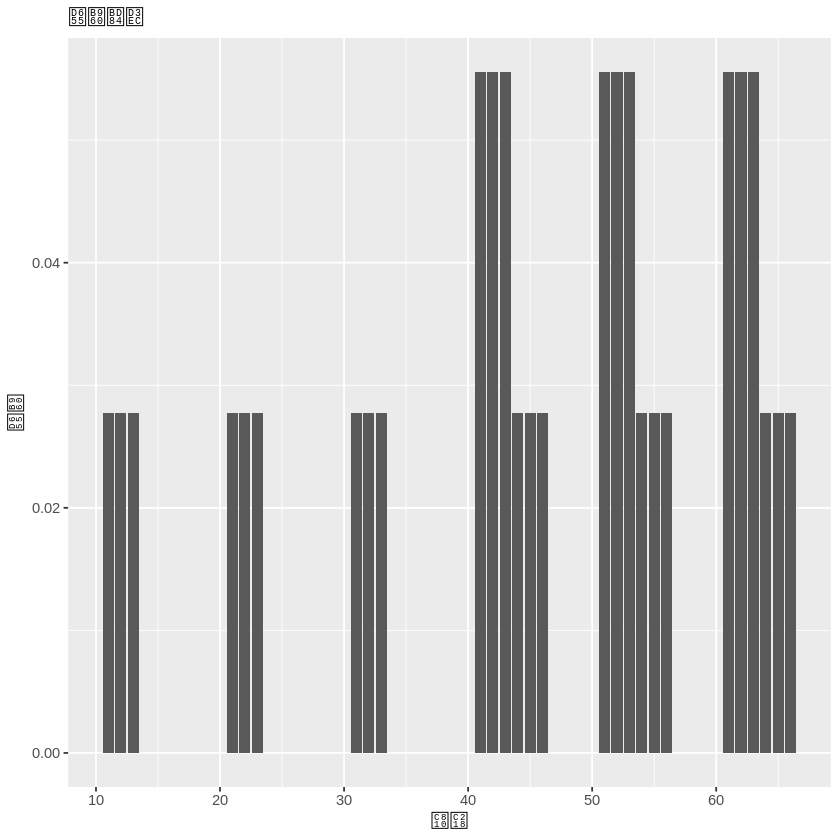

In [ ]:
library(ggplot2)

score <- c()

for (dice1 in 1:6) {
  for (dice2 in 1:6) {
    if (dice1 >= 4) {
      score <- c(score, dice1 * 10 + dice2)
    } else {
      score <- c(score, dice2 * 10 + dice1)
    }
  }
}

score_df <- as.data.frame(table(score))
score_df$pro <- score_df$Freq / 36

ggplot(score_df, aes(x = as.numeric(as.character(score)), y = pro)) +
  geom_bar(stat = 'identity') +
  labs(title='확률분포', x='점수', y='확률')

In [ ]:
기댓값 구하기

In [ ]:
exp_value <- sum(as.numeric(as.character(score_df$score))*score_df$pro)
exp_value

[1] 45.25